# Import Pacakges/Load Datasets

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100 

In [2]:
# load cleaned dataset
# use parse_dates for perserving datetime columns as correct format
df = pd.read_csv('df_cleaned.csv',parse_dates=['start_date','end_date'])

In [3]:
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
0,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856,10.783333
1,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937,8.416667
2,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Gagne / LaSalle,45.422451,-73.601194,35.266667
3,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,LaSalle / 80e avenue,45.415769,-73.637924,29.050000
4,2021-05-21 09:08:02.506,10,2021-05-21 09:29:43.070,185,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Parc des Rapides (LaSalle / 6e avenue),45.429471,-73.593099,21.666667


# Create Weekday Feature

For this project, our goal is to understand the behaviors of BIXI users. I believe there may be valuable insights associated with the specific day of the week for each trip. This is because people tend to utilize public transportation differently on workdays versus weekends. As in this step, I will create a new column to represent the day of the week in our dataset.  
(I will use integers 1 to 7 to represent Monday to Sunday repectively.)

In [4]:
# get start trip weekday
df['start_weekday'] = df['start_date'].dt.weekday+1  # the original dt.weekday function convert datetime to weekday represented by 0 to 6, we plus 1 here for better interpretation

# get end trip weekday
df['end_weekday'] = df['end_date'].dt.weekday+1

In [5]:
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration,start_weekday,end_weekday
0,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856,10.783333,7,7
1,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937,8.416667,7,7
2,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Gagne / LaSalle,45.422451,-73.601194,35.266667,1,1
3,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,LaSalle / 80e avenue,45.415769,-73.637924,29.050000,5,5
4,2021-05-21 09:08:02.506,10,2021-05-21 09:29:43.070,185,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Parc des Rapides (LaSalle / 6e avenue),45.429471,-73.593099,21.666667,5,5


# Split Start/End Times

Now, since each column should only contain only one information, we should split the datetime columns into separated columns.

In [6]:
# split start datetime columns
df['start_year'] = df['start_date'].dt.year
df['start_month'] = df['start_date'].dt.month
df['start_day'] = df['start_date'].dt.day
df['start_hour'] = df['start_date'].dt.hour
df['start_minute'] = df['start_date'].dt.minute
df['start_second'] = df['start_date'].dt.second

# split end datetime columns
df['end_year'] = df['end_date'].dt.year
df['end_month'] = df['end_date'].dt.month
df['end_day'] = df['end_date'].dt.day
df['end_hour'] = df['end_date'].dt.hour
df['end_minute'] = df['end_date'].dt.minute
df['end_second'] = df['end_date'].dt.second

In [7]:
# drop original start/end date columns
df = df.drop(columns=['start_date','end_date'])

Because we are analyzing trip behaviours, milliseconds provide a high level of granularity, but it might be unnecessary for our analysis. As we are more interested in patterns that occur on a broader timescale, such as minutes and hours, rather than fractions of a second. Also inclusion of milliseconds increases the volume of dataframe, potentially making the dataset larger and more complex. By omitting milliseconds, we can have a more manageable and efficient analysis without sacrificing essential information. So I am not including milliseconds from the start/end time columns.

In [8]:
# check if excluding milliseconds introduces back any duplicates into our dataframe
df.duplicated().sum()

199

In [9]:
# look at these duplicates
df[df.duplicated()]

,emplacement_pk_start,emplacement_pk_end,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration,start_weekday,end_weekday,start_year,start_month,start_day,start_hour,start_minute,start_second,end_year,end_month,end_day,end_hour,end_minute,end_second
87523,75,10,1,St-Joseph / 8e avenue Lachine,45.431550,-73.671120,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,24.366667,5,5,2021,8,6,12,44,59,2021,8,6,13,9,22
175805,141,532,0,Marché Maisonneuve,45.553219,-73.539782,Marché Atwater,45.480208,-73.577599,58.483333,6,6,2021,5,1,14,53,46,2021,5,1,15,52,15
177777,141,937,0,Marché Maisonneuve,45.553219,-73.539782,Ste-Claire / Pierre-Tétreault,45.601913,-73.524418,28.233333,6,6,2021,9,4,21,49,48,2021,9,4,22,18,2
198322,144,299,1,Ontario / Viau,45.559482,-73.535496,Poupart / Ontario,45.531939,-73.553439,28.300000,6,6,2021,5,22,14,22,32,2021,5,22,14,50,50
236964,149,266,1,des Érables / Rachel,45.533547,-73.566867,Marie-Anne / de la Roche,45.527758,-73.576185,5.733333,7,7,2021,9,12,12,12,31,2021,9,12,12,18,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203570,1046,316,1,Robin / de la Visitation,45.520923,-73.559177,Prince-Arthur / du Parc,45.510590,-73.575470,14.233333,7,7,2021,8,29,0,17,16,2021,8,29,0,31,31
5221911,1066,289,1,Dorion / Gauthier,45.530674,-73.566250,Métro Papineau (Cartier / Ste-Catherine),45.523530,-73.551990,6.616667,7,7,2021,11,14,16,42,49,2021,11,14,16,49,27
5269001,1081,963,1,Monk / Jacques-Hertel,45.459753,-73.596421,Travaux publics LaSalle (Cordner / Léger),45.445272,-73.624484,29.300000,6,6,2021,9,25,12,26,44,2021,9,25,12,56,3
5270135,1083,573,0,de l’hôtel de ville / Saint-Joseph,45.524277,-73.589290,Parc Père-Marquette (Chambord / Rosemont),45.537088,-73.593219,9.366667,4,4,2021,8,26,22,55,48,2021,8,26,23,5,10


It appears that there are 207 duplicated entries that were distinctive from each other at the millisecond level within the dataset before we omitting the milliseconds. However, given that this constitutes only a small fraction of the entire dataframe, it seems reasonable to streamline our analysis by removing these duplicated entries.

In [10]:
# drop duplicates
df = df.drop_duplicates(keep='first')

# Distribution of Features

First, I will plot the density graphs of features that are essential for our analysis to gain insights into the data, identifying potential issues for making informed decisions during the data analysis process.

In [11]:
# select the features we want
features = ['emplacement_pk_start','emplacement_pk_end','duration','is_member','start_month','start_day','start_weekday']

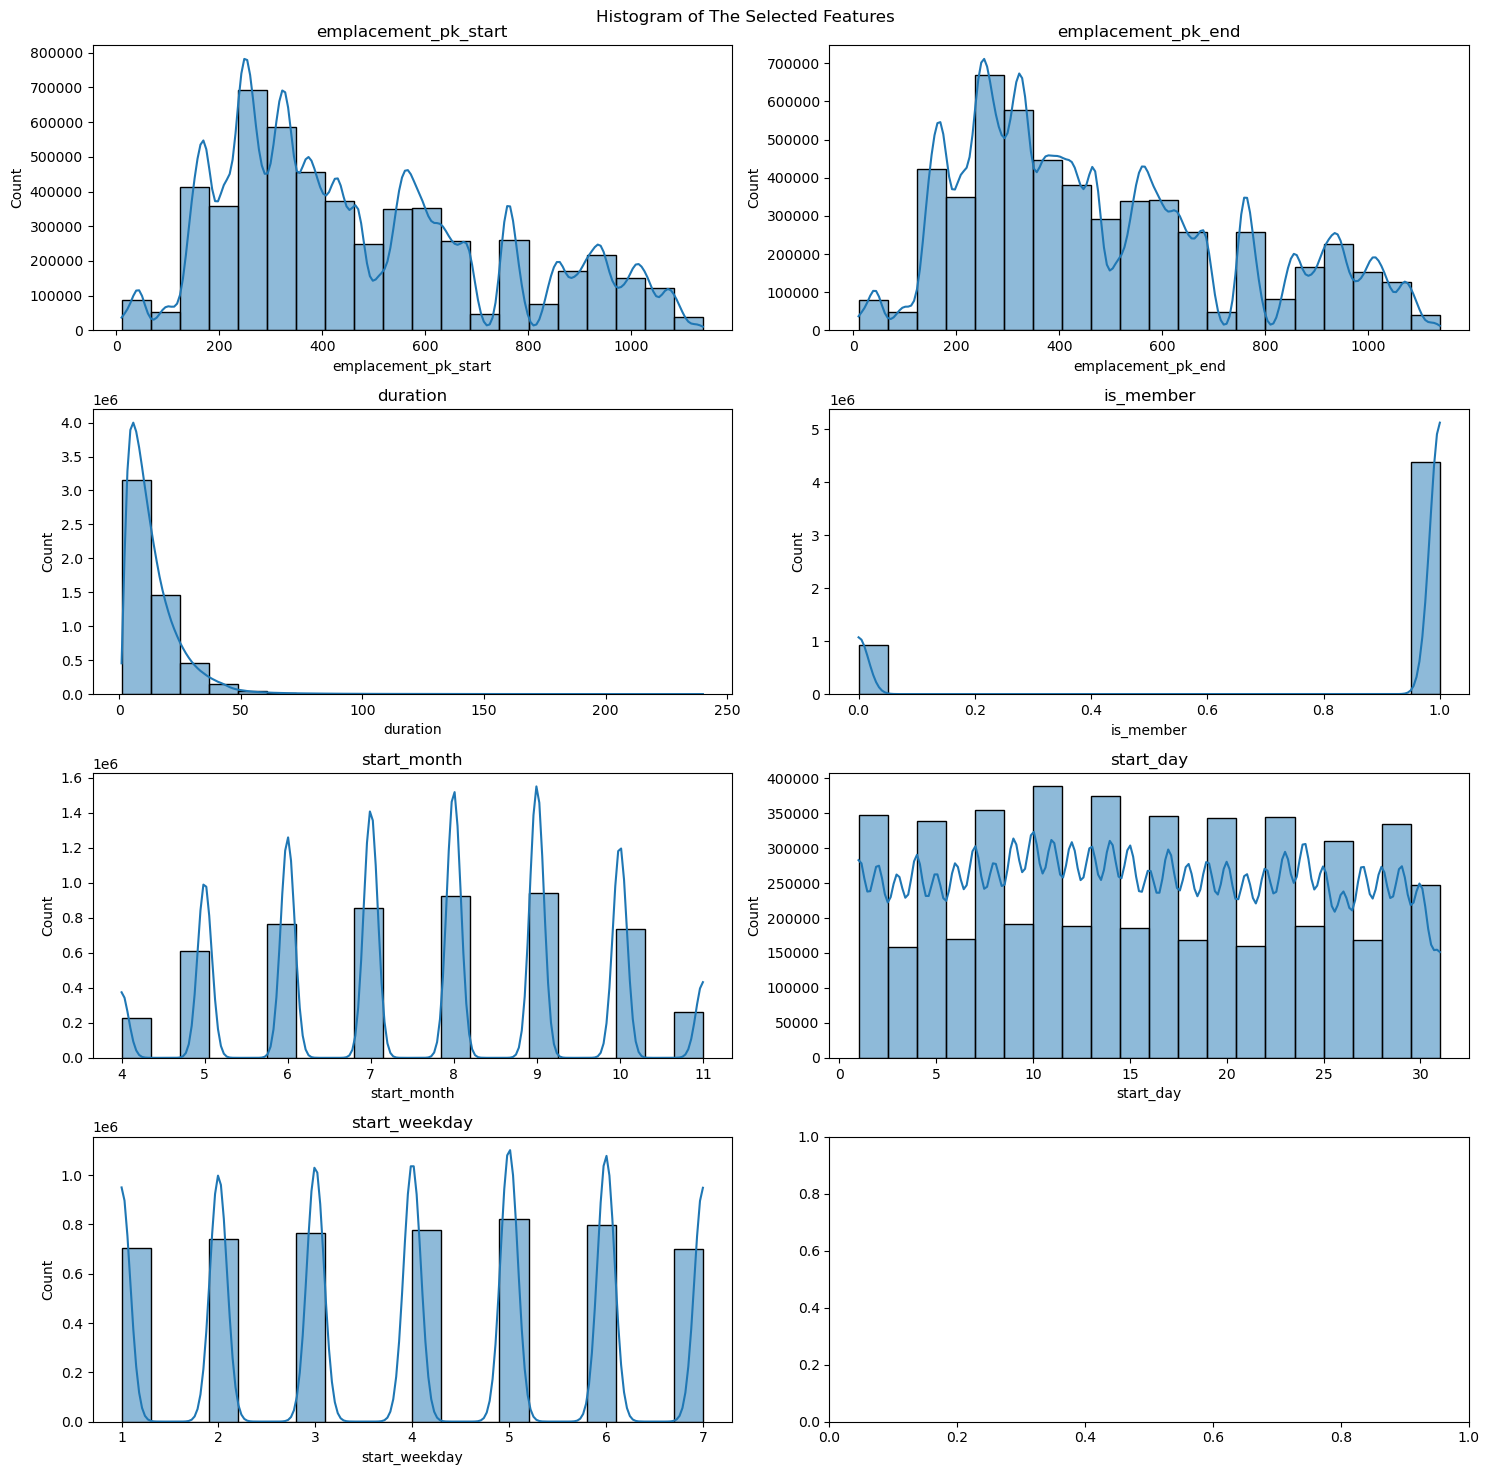

In [12]:
# create subplots for the distribution of features

fig, axes = plt.subplots(nrows=4,
                      ncols=2,
                      figsize=(15,15))
fig.suptitle('Histogram of The Selected Features')

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature],
                bins=20,
                kde=True,
                ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()

plt.show()

**Observation:**
- 'emplacement_pk_start' and 'emplacement_pk_end' follow the similar distribution. This suggests that the popularity of a station is not determined by its specific function, such as being primarily a pickup or drop-off point for bikes. Instead, it implies that other factors, possibly geographical considerations, play a more significant role in influencing station popularity. I will delve deeper into this later.
- The majority of the trips were taken under 1 hour duration.
- Member usage is about 5 times more than non-member usage.
- People tend to use more bikes during warmer months, with August and September standing out as the peak months.
- Bike usage is consistently spread across weekdays, but there is a slight uptick at the beginning of the weekends, followed by a decline on Sundays.

# Trip Duration

The company wants to know how the behaviors differ between members and casual riders, let's explore their trip patterns, see if we can derive some insights from it.

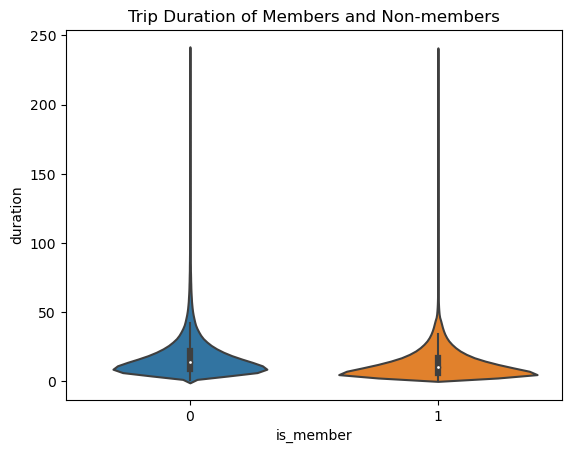

In [13]:
# violin plot of trip duraions
sns.violinplot(data=df,
              x='is_member',
              y='duration')

plt.title('Trip Duration of Members and Non-members')

plt.show()

Due to the prevalence of sparse data points in the dataset, it is hard to see the difference at a broader scale.Let's narrow our focus and zoom in for a more detailed examination of the plots.

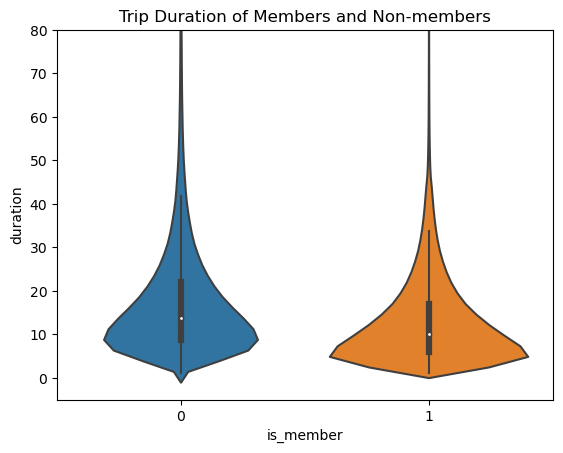

In [14]:
sns.violinplot(data=df,
              x='is_member',
              y='duration')

# set the axis limit to zoom in on the range up to 80 minutes of duration
plt.ylim(-5,80)

plt.title('Trip Duration of Members and Non-members')

plt.show()

Looking at the duration distribution for the two membership groups, members typically engage in shorter trips compared to casual riders. I will also make a histogram for a granular dissect of this observation.

In [15]:
member_trips = df[df['is_member']==1]
non_member_trips = df[df['is_member']==0]

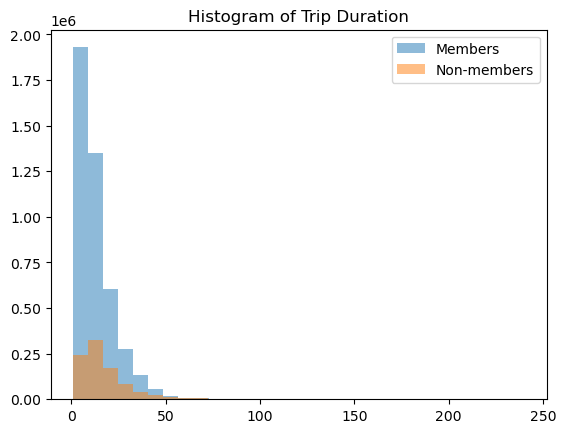

In [16]:
# create the histogram for members and non-members trip duration

plt.hist(member_trips['duration'],
        alpha=0.5,
        bins=30,
        label='Members')
plt.hist(non_member_trips['duration'],
        alpha=0.5,
        bins=30,
        label='Non-members')

plt.legend()
plt.title('Histogram of Trip Duration')

plt.show()

Same problem here with this histogram, due to sparse data points, it is hard to see the pattern of distribution of trips longer than 50 minutes. I will zoom in on various trip duration ranges for a granular look.

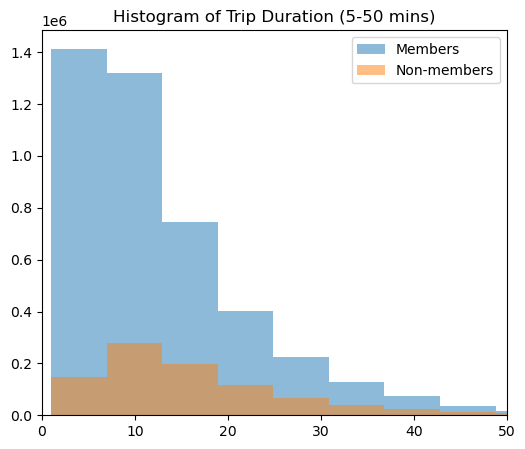

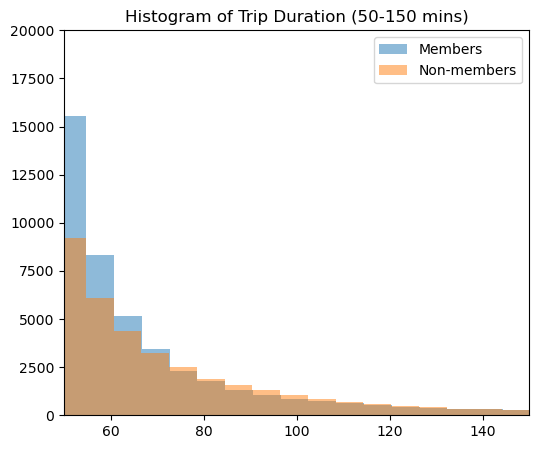

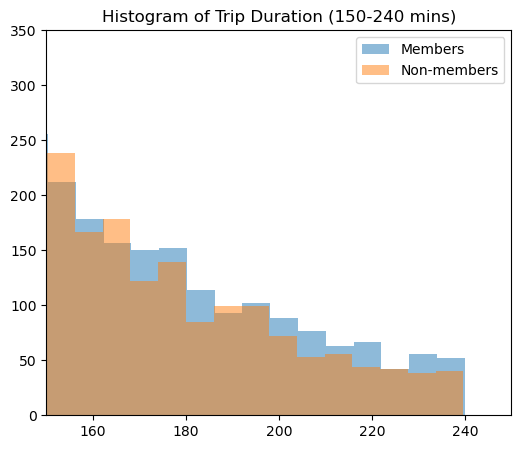

In [17]:
# # trips range from 5 to 50 minutes
plt.figure(figsize=(6,5))
plt.hist(member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Members')
plt.hist(non_member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Non-members')
plt.legend()
plt.title('Histogram of Trip Duration (5-50 mins)')
# set the axis limit to zoom in on the range from 5 to 50 minutes
plt.xlim(0,50)
plt.show()

# trips range from 50 to 150 minutes
plt.figure(figsize=(6,5))
plt.hist(member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Members')
plt.hist(non_member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Non-members')
plt.legend()
plt.title('Histogram of Trip Duration (50-150 mins)')
# set the axis limit to zoom in on the range from 50 to 150 minutes
plt.ylim(0,20000)
plt.xlim(50,150)
plt.show()

# trips range from 150 to 300 minutes
plt.figure(figsize=(6,5))
plt.hist(member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Members')
plt.hist(non_member_trips['duration'],
        alpha=0.5,
        bins=40,
        label='Non-members')
plt.legend()
plt.title('Histogram of Trip Duration (150-240 mins)')
# set the axis limit to zoom in on the range from 150 to 240 minutes
plt.ylim(0,350)
plt.xlim(150,250)
plt.show()

**Observation:** Short trips lasting under 1 hour are predominantly utilized by members, with casual riders showing a gradual increase in numbers from 55 to 160 minutes, surpassing members within this range. However, for longer-duration trips exceeding 160 minutes, the member user base regains dominance over non-members.

# Geographical Patterns

We have observed that two membership groups use the bikes differently across the various trip duration ranges.  I will now explore if there is a relationship between geographic locations and bike usage.

In [18]:
# group trips by locations
avg_duration_by_station = df.groupby(['start_station_name','start_station_latitude','start_station_longitude'])['duration'].mean().reset_index()
avg_duration_by_station

,start_station_name,start_station_latitude,start_station_longitude,duration
0,10e avenue / Holt,45.551912,-73.579211,13.882094
1,10e avenue / Masson,45.550306,-73.573353,13.253929
2,12e avenue / St-Zotique,45.556867,-73.589307,16.558185
3,15e avenue / Masson,45.553898,-73.571387,14.392172
4,16e avenue / Beaubien,45.558281,-73.583159,15.477071
...,...,...,...,...
819,du Tricentenaire / Prince-Albert,45.649546,-73.491916,28.466228
820,la Fontaine / Alexandre-de-Sève,45.523304,-73.558000,12.635524
821,Édouard-Montpetit / de Stirling,45.507230,-73.615085,13.672681
822,Émile-Duployé / Sherbrooke,45.527201,-73.564729,12.509022


In [23]:
# create a scatter plot map with color-coded markers
fig = px.scatter_mapbox(
    avg_duration_by_station,
    lat='start_station_latitude',
    lon='start_station_longitude',
    color='duration',
    size='duration',
    text='start_station_name',
    color_continuous_scale=px.colors.sequential.Magma,
    size_max=20,
    zoom=9.8,
    hover_data={'duration':':.2f'},
    labels={'duration':'Duration',
            'start_station_name':'Station',
            'start_station_latitude':'Latitude',
            'start_station_longitude':'Longitude'})

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(center=dict(lat=45.524353057055286,lon=-73.57442217036842)),
    margin=dict(l=0, r=0, t=0, b=0))


fig.show()

**Observation:** In the map depicted above, I employed a gradient of colors and circles of different sizes to depict trips and their respective durations. Notably, trips with shorter durations on average (smaller and darker circles) tend to cluster around the city center, while longer-duration trips (larger and brighter circles) are dispersed towards the outskirts of the city. Upon closer inspection of the map, it is noteworthy that trips with comparatively longer durations originate from a station in close proximity to a park or recreational destination, such as Casino de Montréal. In contrast, shorter trips are dispersed across various intersections throughout the city. This suggests that individuals using bikes for extended periods are likely engaging in leisure activities, whereas those undertaking shorter trips predominantly use bikes for commuting and navigating the city for their daily activities.

# Bike Usage and Weekday

Remember earlier we noticed in the distribution graphs that bike usage is varying throughtout the week, let's explore deeper.

In [ ]:
# make crosstable for percentage of trips by members and non-members throughout the week
weekday_df = pd.crosstab(df['start_weekday'], df['is_member'], normalize='index') * 100

# round the percentage to 2 decimal places
weekday_df = weekday_df.round(2)

weekday_df

In [ ]:
plt.figure(figsize=(8,8))

weekday_df.plot(kind='bar',
               stacked=False)
plt.title('% of Trips throughout the Week')
plt.xlabel('Weekday')
plt.ylabel('% of Total Trips')

plt.tight_layout()
plt.show()

**Observation:** In general, member trips significantly outnumber those of casual riders. The proportion of member trips reaches its peak on Tuesday, gradually decreasing until Saturday, with a slight uptick on Sunday. For non-members, the trend is the oppposite; there is a gradual rise in casual ridership as the week progresses, peaking on Saturday, which marks the day with the highest number of non-member users. Subsequently, there is a decline on Sunday. This finding reinforces the notion that a significant portion of casual riders opt for weekend bike usage, likely engaging in leisure activities. In contrast, members predominantly use bikes for daily commutes and less frequently for leisure pursuits.

In [ ]:
# check the average trip duartion of two membership groups throughout the week
duration_week_df = df.groupby(['start_weekday','is_member'])['duration'].mean().reset_index()
duration_week_df = duration_week_df.round(2)
duration_week_df

In [ ]:
# make a bar plot to compare the trip duration for two riderships during the week

sns.barplot(duration_week_df,
           x='start_weekday',
           y='duration',
           hue='is_member')

plt.title('Average Trip Duration in A Week')
plt.xlabel('Weekday')
plt.ylabel('Average Duration (mins)')

plt.show()

**Observation:** Non-members exhibit longer average bike usage durations compared to members. Casual riders, in particular, extend their bike trips, with Monday recording an average of 17.3 minutes. This duration slightly decreases to 16.3 minutes on Tuesday, followed by a gradual rise, reaching a peak on Saturday at approximately 20.3 minutes, followed by a slight decline to 20 minutes on Sunday.<br>In contrast, the average trip duration for members remains relatively stable around 12.6 minutes from Monday to Friday, witnessing a slight increase during the weekdays. However, there is a notable spike on Saturday, where the average duration jumps to 14.3 minutes. This reveals distinct patterns in the average trip durations between casual riders and members throughout the week.
Additionally, it can be inferred that bike trips taken for leisure purposes tend to have longer durations.

# Daily Patterns

In [ ]:
df['start_hour'].value_counts().sort_index().plot(kind='bar')

In [ ]:
weekday_hour_df = df.groupby(['start_weekday','start_hour','is_member']).size().reset_index(name='number_of_trips')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
weekday_hour_df

In [ ]:
# define a dictionary to map the weekday numbers and corresponding names
weekdays = {1:'Monday',
            2:'Tuesday',
            3:'Wednesday',
            4:'Thursday',
            5:'Friday',
            6:'Saturday',
            7:'Sunday'}

# loop through weekdays
for i,name in weekdays.items():
    
    plt.figure(figsize=(6,5))
    
    sns.barplot(data=weekday_hour_df[weekday_hour_df['start_weekday']==i],
               x='start_hour',
               y='number_of_trips',
               hue='is_member')
    
    plt.title(f'Trips on {name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.tight_layout()
    
    plt.show()

**Observation:** Comparing members and non-members daily usage, they follow the similar patterns throughout the week. The daily bike usage exhibits a consistent pattern from Monday to Friday, showing a gradual increase from 4 a.m. to 17 p.m. with minor fluctuations in numbers. Notably, there are two peak periods at 8 a.m. and 17 p.m., coinciding with rush hours, and a subsequent decline in usage during the night.<br>
Fridays generally conform to this trend, although there is a noticeable uptick in nighttime bike usage on Fridays and Saturdays, likely attributed to increased leisure activities during these evenings. On Saturdays and Sundays, the bar graphs present a distinct shape, with a concentration of trips primarily occurring in the afternoon. Additionally, there is a notable surge in bike usage at 0 a.m. for both weekend days.

# Business Recommendations

Based on the EDA for BIXI bike usage in Montreal, several business recommendaitons can be derived to improve their business:

**1. Geographical Considerations for Station Placement:**
The distribution of start and end station popularity suggests that the specific function of a station (pickup and drop-off) may not be the primary factor influencing popularity. Consider further analyzing and understanding geographical factors that contribute to station popularity. Evaluate the placement of stations in high-traffic areas and strategically position them to cater to user demand.

**2. Membership Promotion and Engagement:**
Given that member usage is significantly higher than non-member usage, focus on promoting and engaging more users to become members. Implement targeted marketing campaigns, loyalty programs, or incentives to encourage non-members to subscribe. This can help increase revenue and foster long-term customer relationships.

**3. Understanding Seasonal Trends:**
Acknowledge the seasonal variations in bike usage, with August and September being peak months. Plan marketing initiatives, events, or promotions during these months to capitalize on increased demand. Additionally, consider introducing seasonal pricing or packages to attract more users during peak periods.

**4. Weekday vs. Weekend Strategies:**
Tailor marketing and operational strategies to accommodate the observed differences between weekdays and weekends. Capitalize on the weekday commuter market for members and design weekend-focused promotions or events to attract casual riders engaging in leisure activities.

**5. Trip Duration-Based Marketing:**
Leverage the insights into trip durations to target different user segments. For members, emphasize the convenience of short trips for daily commuting, while for casual riders, highlight the suitability of bikes for longer leisure activities. Design marketing materials and promotions that align with the varied needs of these two user groups.

**6. Destination-Centric Strategies:**
Recognize that longer-duration trips tend to originate near parks or recreational destinations. Consider partnerships or promotional activities with businesses or attractions in these areas to encourage more extended bike trips. This could involve offering special packages, discounts, or events to enhance the overall user experience.lign bike availability with usage patterns, especially during peak hours at 8 a.m. and 5 p.m. Ensure that there are enough bikes at popular stations during rush hours to meet the demand. Implement real-time monitoring and redistribution strategies to optimize bike availability and enhance user satisfaction.

**7. Optimizing Bike Availability:**
lign bike availability with usage patterns, especially during peak hours at 8 a.m. and 5 p.m. Ensure that there are enough bikes at popular stations during rush hours to meet the demand. Implement real-time monitoring and redistribution strategies to optimize bike availability and enhance user satisfaction.

**8. Data-Driven Operations:**
Continuously monitor and analyze user behavior, station popularity, and trip patterns. Implement data-driven decision-making processes to adapt operations, marketing, and promotional strategies dynamically. Regularly update station locations based on changing user preferences and demands.